# Model Usage

Make sure to run the script at least once to generate the models used in this.

## Environment and Imports

In [437]:
# To access files in parent directory
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

parent_dir

'/Users/joshcaponigro/Documents/Coding/Fantasy-Football-Tools/FantasyPointsEstimator'

In [438]:
# Local modules
from data_processing import load_data, impute_missing_values_with_zero
from feature_engineering import create_features

In [439]:
import pandas as pd
import joblib

These is the same as config, should figure out way to import it here. Not gonna bother for now.

In [440]:
POSITIONS = ["QB", "RB", "TE", "WR"]
MODELS = [
    "Ridge",
    "ElasticNet",
    "RandomForest",
    "GradientBoosting",
    "CatBoost",
    "MLP",
]  # may or may not be accurate, depends on models in model_training.py

In [441]:
"""
REQUIRED COLUMNS FOR MODEL PREDICTION
"""

FEATURES = [
    "home",
    "Oppt_ARI",
    "Oppt_ATL",
    "Oppt_BAL",
    "Oppt_BUF",
    "Oppt_CAR",
    "Oppt_CHI",
    "Oppt_CIN",
    "Oppt_CLE",
    "Oppt_DAL",
    "Oppt_DEN",
    "Oppt_DET",
    "Oppt_GB",
    "Oppt_HOU",
    "Oppt_IND",
    "Oppt_JAX",
    "Oppt_KC",
    "Oppt_LA",
    "Oppt_LAC",
    "Oppt_LV",
    "Oppt_MIA",
    "Oppt_MIN",
    "Oppt_NE",
    "Oppt_NO",
    "Oppt_NYG",
    "Oppt_NYJ",
    "Oppt_PHI",
    "Oppt_PIT",
    "Oppt_SEA",
    "Oppt_SF",
    "Oppt_TB",
    "Oppt_TEN",
    "Oppt_WAS",
    "Team_ARI",
    "Team_ATL",
    "Team_BAL",
    "Team_BUF",
    "Team_CAR",
    "Team_CHI",
    "Team_CIN",
    "Team_CLE",
    "Team_DAL",
    "Team_DEN",
    "Team_DET",
    "Team_GB",
    "Team_HOU",
    "Team_IND",
    "Team_JAX",
    "Team_KC",
    "Team_MIA",
    "Team_MIN",
    "Team_NE",
    "Team_NO",
    "Team_NYG",
    "Team_NYJ",
    "Team_PHI",
    "Team_PIT",
    "Team_SEA",
    "Team_SF",
    "Team_TB",
    "Team_TEN",
    "Team_WAS",
    "season_attempts",
    "recent_attempts",
    "prev_attempts",
    "season_completions",
    "recent_completions",
    "prev_completions",
    "season_passing_yards",
    "recent_passing_yards",
    "prev_passing_yards",
    "season_passing_tds",
    "recent_passing_tds",
    "prev_passing_tds",
    "season_interceptions",
    "recent_interceptions",
    "prev_interceptions",
    "season_carries",
    "recent_carries",
    "prev_carries",
    "season_rushing_yards",
    "recent_rushing_yards",
    "prev_rushing_yards",
    "season_rushing_tds",
    "recent_rushing_tds",
    "prev_rushing_tds",
    "season_receptions",
    "recent_receptions",
    "prev_receptions",
    "season_targets",
    "recent_targets",
    "prev_targets",
    "season_receiving_yards",
    "recent_receiving_yards",
    "prev_receiving_yards",
    "season_receiving_tds",
    "recent_receiving_tds",
    "prev_receiving_tds",
    "season_special_teams_tds",
    "recent_special_teams_tds",
    "prev_special_teams_tds",
    "season_rushing_fumbles",
    "recent_rushing_fumbles",
    "prev_rushing_fumbles",
    "season_receiving_fumbles",
    "recent_receiving_fumbles",
    "prev_receiving_fumbles",
    "season_sack_fumbles",
    "recent_sack_fumbles",
    "prev_sack_fumbles",
    "season_passing_yards_per_attempt",
    "recent_passing_yards_per_attempt",
    "prev_passing_yards_per_attempt",
    "season_rushing_yards_per_carry",
    "recent_rushing_yards_per_carry",
    "prev_rushing_yards_per_carry",
    "season_passing_yards_squared",
    "recent_passing_yards_squared",
    "prev_passing_yards_squared",
    "season_rushing_yards_squared",
    "recent_rushing_yards_squared",
    "prev_rushing_yards_squared",
    "season_receiving_yards_per_target",
    "recent_receiving_yards_per_target",
    "prev_receiving_yards_per_target",
    "season_receiving_yards_per_reception",
    "recent_receiving_yards_per_reception",
    "prev_receiving_yards_per_reception",
    "fantasy_points_lag1",
    "fantasy_points_lag2",
]

## Configuration

In [442]:
POSITION = "QB"
MODEL = "Ridge"

In [443]:
MODEL_FILEPATH = f"../output/models/{POSITION}_{MODEL}.joblib"

In [444]:
# Just a quick safety check.
assert POSITION in POSITIONS, f"Position {POSITION} not in {POSITIONS}"
assert MODEL in MODELS, f"Model {MODEL} not in {MODELS}"

## Model

In [445]:
model = joblib.load(MODEL_FILEPATH)

### Input

In [446]:
PLAYER_NAME = "Tom Brady"
YEAR = 2019

In [447]:
def get_player_data():
    data = load_data(years=[YEAR], filepath="../data")
    return data.loc[
        (data["player_name"] == PLAYER_NAME)
        | (data["player_display_name"] == PLAYER_NAME)
    ]

In [448]:
data = get_player_data()

2024-08-18 20:09:13,599 - data_processing - DEBUG - Loading weekly data for 2019 from local cache.
2024-08-18 20:09:13,631 - data_processing - DEBUG - Loading schedule data for 2019 from local cache.


In [449]:
assert data.shape[0] != 0, f"Player {PLAYER_NAME} not found in data."

Now use the feature engineering used for models

In [450]:
df = pd.DataFrame(data)
df, features = create_features(df)

2024-08-18 20:09:13,802 - feature_engineering - DEBUG - ['home', 'Oppt_BUF', 'Oppt_CLE', 'Oppt_DAL', 'Oppt_KC', 'Oppt_MIA', 'Oppt_NYG', 'Oppt_NYJ', 'Oppt_PIT', 'Oppt_TEN', 'Team_NE', 'season_attempts', 'recent_attempts', 'prev_attempts', 'season_completions', 'recent_completions', 'prev_completions', 'season_passing_yards', 'recent_passing_yards', 'prev_passing_yards', 'season_passing_tds', 'recent_passing_tds', 'prev_passing_tds', 'season_interceptions', 'recent_interceptions', 'prev_interceptions', 'season_carries', 'recent_carries', 'prev_carries', 'season_rushing_yards', 'recent_rushing_yards', 'prev_rushing_yards', 'season_rushing_tds', 'recent_rushing_tds', 'prev_rushing_tds', 'season_receptions', 'recent_receptions', 'prev_receptions', 'season_targets', 'recent_targets', 'prev_targets', 'season_receiving_yards', 'recent_receiving_yards', 'prev_receiving_yards', 'season_receiving_tds', 'recent_receiving_tds', 'prev_receiving_tds', 'season_special_teams_tds', 'recent_special_teams

In [451]:
display(df)

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,prev_passing_yards_squared,season_rushing_yards_squared,recent_rushing_yards_squared,prev_rushing_yards_squared,season_receiving_yards_per_target,recent_receiving_yards_per_target,prev_receiving_yards_per_target,season_receiving_yards_per_reception,recent_receiving_yards_per_reception,prev_receiving_yards_per_reception
0,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,1,REG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,3,REG,...,116281.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,6,REG,...,93636.0,0.500000,0.500000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,8,REG,...,111556.0,12.333333,12.333333,36.0,NaN,NaN,NaN,NaN,NaN,NaN
4,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,12,REG,...,67081.0,9.250000,9.250000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,14,REG,...,36100.0,9.200000,11.500000,9.0,NaN,NaN,NaN,NaN,NaN,NaN
6,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,16,REG,...,28561.0,74.333333,111.250000,400.0,NaN,NaN,NaN,NaN,NaN,NaN
7,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,17,REG,...,73441.0,66.000000,106.250000,16.0,NaN,NaN,NaN,NaN,NaN,NaN
8,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,NE,2019,18,POST,...,48841.0,57.750000,106.250000,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [452]:
display(df[["fantasy_points_ppr"]])

,fantasy_points_ppr
0,25.64
1,20.14
2,21.96
3,18.36
4,11.30
5,10.76
6,17.24
7,14.84
8,6.36


In [453]:
features_df = df[features]

### Safety Check

In [454]:
features_df.columns, features_df.shape

(Index(['home', 'Oppt_BUF', 'Oppt_CLE', 'Oppt_DAL', 'Oppt_KC', 'Oppt_MIA',
        'Oppt_NYG', 'Oppt_NYJ', 'Oppt_PIT', 'Oppt_TEN', 'Team_NE',
        'season_attempts', 'recent_attempts', 'prev_attempts',
        'season_completions', 'recent_completions', 'prev_completions',
        'season_passing_yards', 'recent_passing_yards', 'prev_passing_yards',
        'season_passing_tds', 'recent_passing_tds', 'prev_passing_tds',
        'season_interceptions', 'recent_interceptions', 'prev_interceptions',
        'season_carries', 'recent_carries', 'prev_carries',
        'season_rushing_yards', 'recent_rushing_yards', 'prev_rushing_yards',
        'season_rushing_tds', 'recent_rushing_tds', 'prev_rushing_tds',
        'season_receptions', 'recent_receptions', 'prev_receptions',
        'season_targets', 'recent_targets', 'prev_targets',
        'season_receiving_yards', 'recent_receiving_yards',
        'prev_receiving_yards', 'season_receiving_tds', 'recent_receiving_tds',
        'prev_re

In [455]:
# Quick safety check
assert features_df.shape[0] > 0 and features_df.shape[1] > 0, "DataFrame must be 2D"

In [456]:
def ensure_all_columns(df: pd.DataFrame, required_columns: list) -> pd.DataFrame:
    for col in required_columns:
        if col not in df.columns:
            df[col] = 0
    df = df[required_columns]
    return df


features_df = ensure_all_columns(features_df.copy(), FEATURES)

In [457]:
features_df.columns, features_df.shape

(Index(['home', 'Oppt_ARI', 'Oppt_ATL', 'Oppt_BAL', 'Oppt_BUF', 'Oppt_CAR',
        'Oppt_CHI', 'Oppt_CIN', 'Oppt_CLE', 'Oppt_DAL',
        ...
        'recent_rushing_yards_squared', 'prev_rushing_yards_squared',
        'season_receiving_yards_per_target',
        'recent_receiving_yards_per_target', 'prev_receiving_yards_per_target',
        'season_receiving_yards_per_reception',
        'recent_receiving_yards_per_reception',
        'prev_receiving_yards_per_reception', 'fantasy_points_lag1',
        'fantasy_points_lag2'],
       dtype='object', length=130),
 (9, 130))

In [458]:
assert (
    list(features_df.columns) == FEATURES
), "DataFrame columns are not in the correct order."

In [459]:
features_df = impute_missing_values_with_zero(features_df, FEATURES)

2024-08-18 20:09:13,878 - data_processing - DEBUG - Imputing missing values with zero for features: ['home', 'Oppt_ARI', 'Oppt_ATL', 'Oppt_BAL', 'Oppt_BUF', 'Oppt_CAR', 'Oppt_CHI', 'Oppt_CIN', 'Oppt_CLE', 'Oppt_DAL', 'Oppt_DEN', 'Oppt_DET', 'Oppt_GB', 'Oppt_HOU', 'Oppt_IND', 'Oppt_JAX', 'Oppt_KC', 'Oppt_LA', 'Oppt_LAC', 'Oppt_LV', 'Oppt_MIA', 'Oppt_MIN', 'Oppt_NE', 'Oppt_NO', 'Oppt_NYG', 'Oppt_NYJ', 'Oppt_PHI', 'Oppt_PIT', 'Oppt_SEA', 'Oppt_SF', 'Oppt_TB', 'Oppt_TEN', 'Oppt_WAS', 'Team_ARI', 'Team_ATL', 'Team_BAL', 'Team_BUF', 'Team_CAR', 'Team_CHI', 'Team_CIN', 'Team_CLE', 'Team_DAL', 'Team_DEN', 'Team_DET', 'Team_GB', 'Team_HOU', 'Team_IND', 'Team_JAX', 'Team_KC', 'Team_MIA', 'Team_MIN', 'Team_NE', 'Team_NO', 'Team_NYG', 'Team_NYJ', 'Team_PHI', 'Team_PIT', 'Team_SEA', 'Team_SF', 'Team_TB', 'Team_TEN', 'Team_WAS', 'season_attempts', 'recent_attempts', 'prev_attempts', 'season_completions', 'recent_completions', 'prev_completions', 'season_passing_yards', 'recent_passing_yards', 'prev_

### Prediction

In [460]:
prediction = model.predict(features_df)

### Output

In [461]:
prediction

array([10.93416558, 17.2632865 , 18.43301789, 18.89841726, 16.88395502,
       16.46410983, 17.32934607, 16.49625569, 16.64878604])

In [462]:
df = pd.concat([df, features_df], axis=1)
df["predicted_fantasy_points"] = prediction
df["difference"] = df["predicted_fantasy_points"] - df["fantasy_points_ppr"]

df[
    [
        "player_name",
        "week",
        "fantasy_points_ppr",
        "predicted_fantasy_points",
        "difference",
    ]
]

,player_name,week,fantasy_points_ppr,predicted_fantasy_points,difference
0,T.Brady,1,25.64,10.934166,-14.705834
1,T.Brady,3,20.14,17.263287,-2.876713
2,T.Brady,6,21.96,18.433018,-3.526982
3,T.Brady,8,18.36,18.898417,0.538417
4,T.Brady,12,11.30,16.883955,5.583955
5,T.Brady,14,10.76,16.464110,5.704110
6,T.Brady,16,17.24,17.329346,0.089346
7,T.Brady,17,14.84,16.496256,1.656256
8,T.Brady,18,6.36,16.648786,10.288786


In [464]:
df["difference"].describe()

count     9.000000
mean      0.305704
std       7.148017
min     -14.705834
25%      -2.876713
50%       0.538417
75%       5.583955
max      10.288786
Name: difference, dtype: float64

<Axes: >

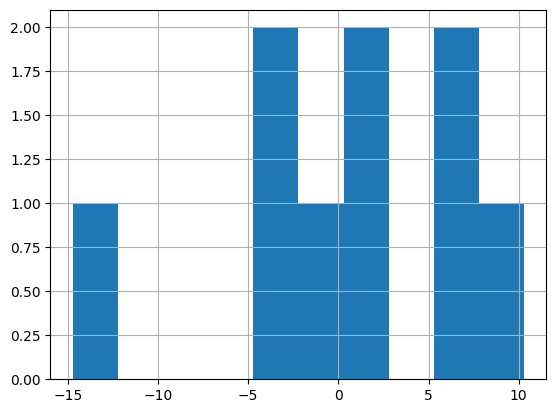

In [465]:
df["difference"].hist()

In [ ]:
mean_diff = df["difference"].mean()
std_diff = df["difference"].std()

mean_diff, std_diff

<Axes: >

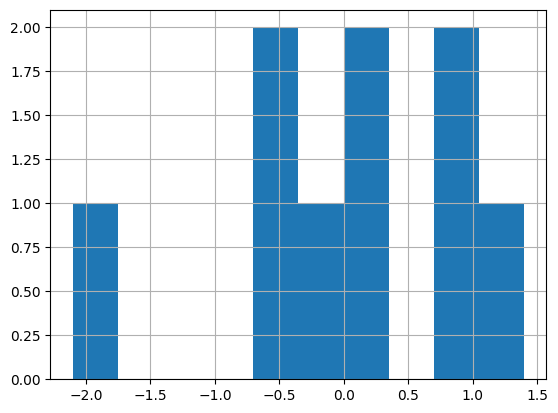

In [469]:
# how many are each std dev away from the mean?
df["std_devs"] = (df["difference"] - mean_diff) / std_diff

df["std_devs"].hist()

In [470]:
df["difference"].abs().sum()

44.97039994015212